# Kidney Classification Prediction

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_val_score

#  Use for the Unnecesssary Warnings 
import warnings
warnings.filterwarnings("ignore")

#  Use for setting the default Theme.
sns.set()

# Use for the 
plt.style.use("ggplot")

# Data Collection and Processing.

In [4]:
dataset = pd.read_csv("kidney_disease.csv")
dataset

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [5]:
dataset.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [6]:
dataset.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [7]:
dataset["classification"].value_counts()

#  Its a multi class supervised classification problem.

classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

## EDA (Exploratory Data Analysis)

In [8]:
#  delete the id column.
dataset.drop("id", axis=1, inplace=True)

In [9]:
dataset.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [10]:
#  we need to change the column name of the dataset.
dataset.columns = [
    'age',  
    'blood_pressure',  
    'specific_gravity',  
    'albumin',  
    'sugar',  
    'red_blood_cells',  
    'pus_cell',  
    'pus_cell_clumps',  
    'bacteria',  
    'blood_glucose_random',  
    'blood_urea',  
    'serum_creatinine',  
    'sodium',  
    'potassium',  
    'hemoglobin',  
    'packed_cell_volume',  
    'white_blood_cell_count',  
    'red_blood_cell_count',  
    'hypertension',  
    'diabetes_mellitus',  
    'coronary_artery_disease',  
    'appetite',  
    'pedal_edema',  
    'anemia',  
    'classification'  
]

In [11]:
dataset

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [12]:
dataset.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [14]:
dataset.dtypes[dataset.dtypes == "object"]

red_blood_cells            object
pus_cell                   object
pus_cell_clumps            object
bacteria                   object
packed_cell_volume         object
white_blood_cell_count     object
red_blood_cell_count       object
hypertension               object
diabetes_mellitus          object
coronary_artery_disease    object
appetite                   object
pedal_edema                object
anemia                     object
classification             object
dtype: object

In [15]:
dataset.dtypes[dataset.dtypes == "float"]

age                     float64
blood_pressure          float64
specific_gravity        float64
albumin                 float64
sugar                   float64
blood_glucose_random    float64
blood_urea              float64
serum_creatinine        float64
sodium                  float64
potassium               float64
hemoglobin              float64
dtype: object

In [16]:
dataset.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [18]:
# 16  white_blood_cell_count   295 non-null    object 
# 17  red_blood_cell_count     270 non-null    object 


# These columns we have need to convert into the numeric from the Object because its a Object Column.
dataset["packed_cell_volume"] = pd.to_numeric(dataset["packed_cell_volume"], errors='coerce')
dataset["white_blood_cell_count"] = pd.to_numeric(dataset["white_blood_cell_count"], errors='coerce')
dataset["red_blood_cell_count"] = pd.to_numeric(dataset["red_blood_cell_count"], errors='coerce')

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [20]:
len( dataset.columns)

25

In [21]:
dataset.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
hemoglobin                 float64
packed_cell_volume         float64
white_blood_cell_count     float64
red_blood_cell_count       float64
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
pedal_edema                 object
anemia                      object
classification              object
dtype: object

In [22]:
#  Split into the categorical and the numerical Dataset.
categorical_col = [val for val in dataset.columns if dataset[val].dtypes == "object"]
numerical_col = [val for val in dataset.columns if dataset[val].dtypes == "float64"]

In [23]:
print(categorical_col)
print(numerical_col)

['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia', 'classification']
['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']


In [24]:
for i in categorical_col:
    print(f'{i} {dataset[i].unique()}')

red_blood_cells [nan 'normal' 'abnormal']
pus_cell ['normal' 'abnormal' nan]
pus_cell_clumps ['notpresent' 'present' nan]
bacteria ['notpresent' 'present' nan]
hypertension ['yes' 'no' nan]
diabetes_mellitus ['yes' 'no' ' yes' '\tno' '\tyes' nan]
coronary_artery_disease ['no' 'yes' '\tno' nan]
appetite ['good' 'poor' nan]
pedal_edema ['no' 'yes' nan]
anemia ['no' 'yes' nan]
classification ['ckd' 'ckd\t' 'notckd']


In [25]:
#  in the dataset we have some different kind of values into the features.
# dataset.diabetes_mellitus[dataset.diabetes_mellitus == "yes"]
# dataset.diabetes_mellitus[dataset.diabetes_mellitus == "\tno"]
# dataset.classification[dataset.classification == "ckd\t"]

In [26]:
#  Replace the wrong values to the right one.
dataset.replace({"diabetes_mellitus": {"\tno": "no", "\tyes" : "yes", " yes": "yes"}}, inplace=True)
dataset.replace({"coronary_artery_disease": {"\tno": "no"}}, inplace=True)
dataset.replace({"classification": {"ckd\t": "ckd"}}, inplace=True)
# dataset.replace({"classification": {"yes": 1, "no": 0}}, inplace=True)

In [27]:
dataset.diabetes_mellitus.value_counts()

diabetes_mellitus
no     261
yes    137
Name: count, dtype: int64

In [28]:
dataset.replace({"diabetes_mellitus": {" yes": "yes"}}, inplace=True)

In [29]:
#  here now we have the unique Value.
dataset.diabetes_mellitus.value_counts()

diabetes_mellitus
no     261
yes    137
Name: count, dtype: int64

In [30]:
dataset.isnull().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
classification               0
dtype: int64

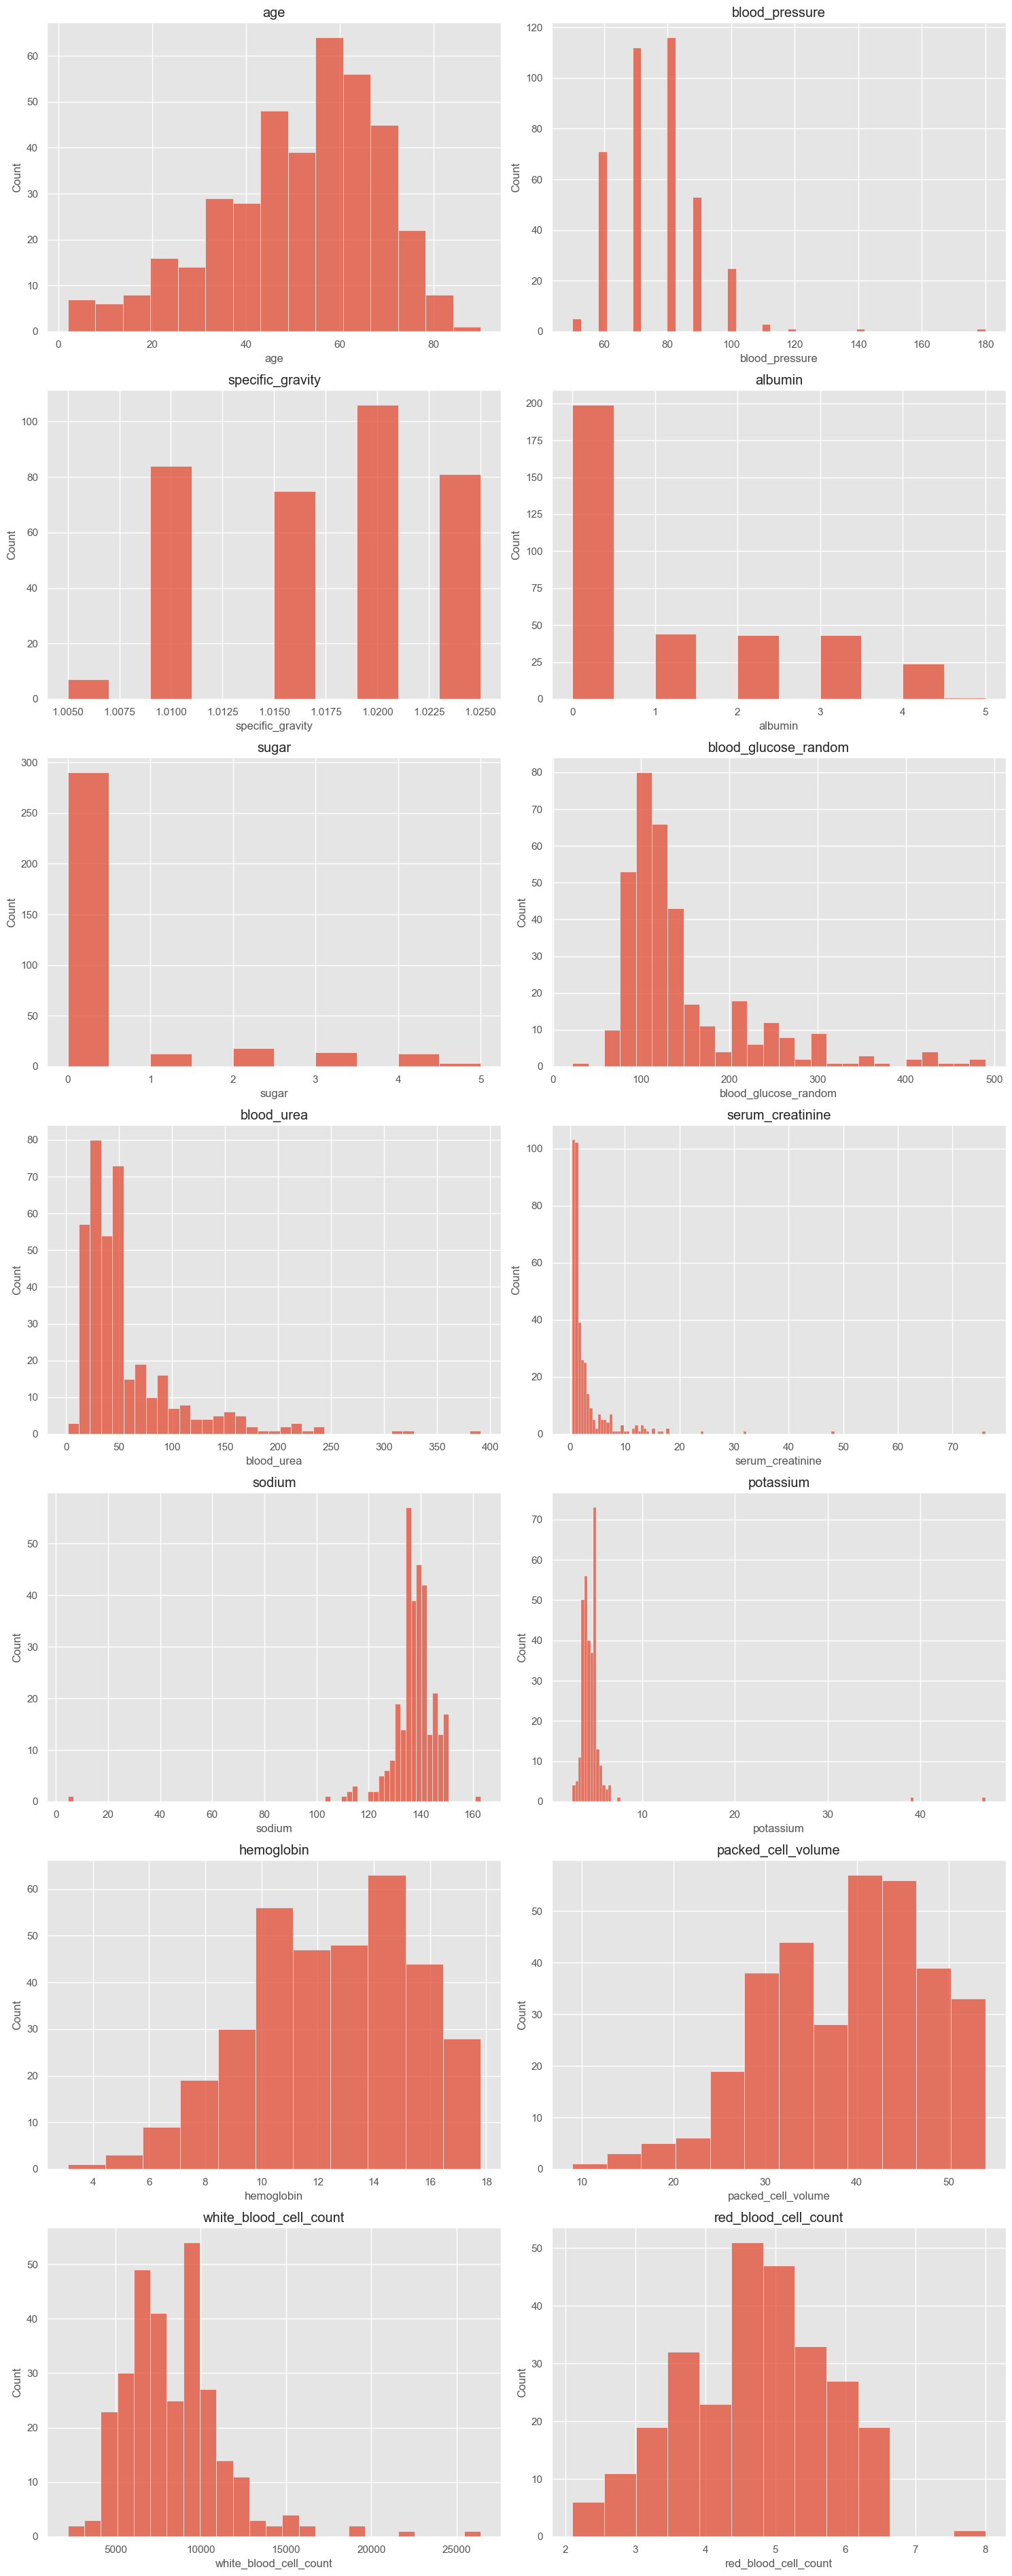

In [31]:
#  we need to plot the histogram for all the numeric columns.
dataset.columns
plt.figure(figsize=(15,70))
for i,val in enumerate(numerical_col):
    plt.subplot(13, 2, i + 1)
    sns.histplot(dataset[val])
    plt.title(val)

plt.tight_layout()
plt.show()

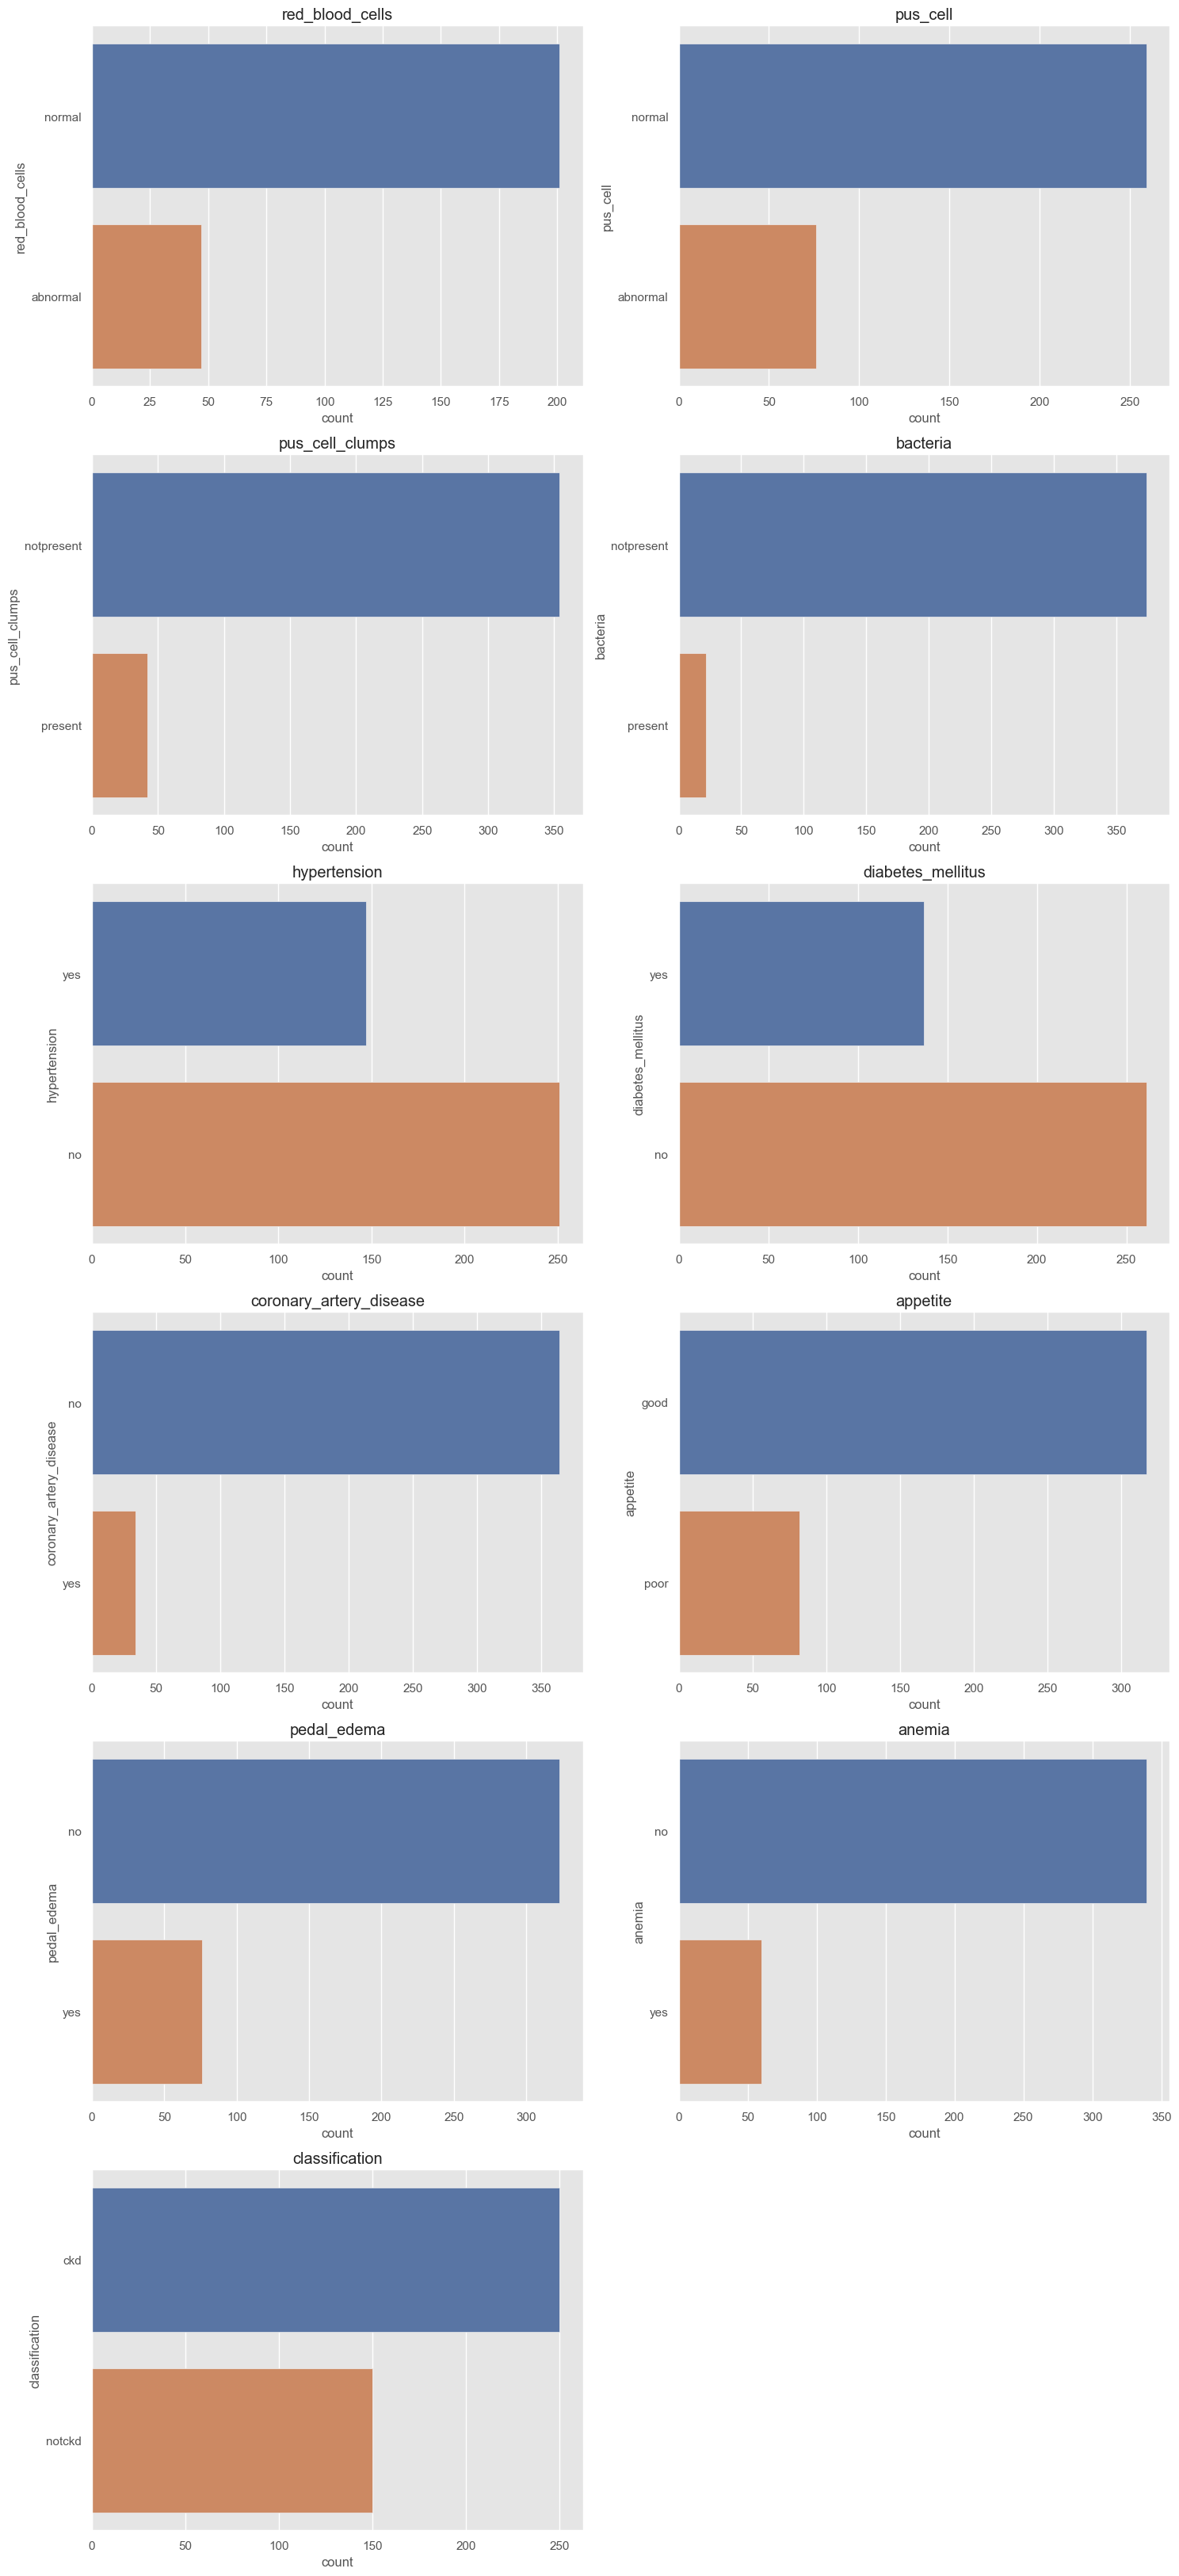

In [32]:
#  we need to plot the histogram for all the categorical columns.
dataset.columns
plt.figure(figsize=(15,70))
for i,val in enumerate(categorical_col):
    plt.subplot(13, 2, i + 1)
    sns.countplot(dataset[val], palette="deep")
    plt.title(val)

plt.tight_layout()
plt.show()

In [33]:
for i in categorical_col:
    print(f'{i} {dataset[i].unique()}')

red_blood_cells [nan 'normal' 'abnormal']
pus_cell ['normal' 'abnormal' nan]
pus_cell_clumps ['notpresent' 'present' nan]
bacteria ['notpresent' 'present' nan]
hypertension ['yes' 'no' nan]
diabetes_mellitus ['yes' 'no' nan]
coronary_artery_disease ['no' 'yes' nan]
appetite ['good' 'poor' nan]
pedal_edema ['no' 'yes' nan]
anemia ['no' 'yes' nan]
classification ['ckd' 'notckd']


In [34]:
dataset.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [35]:
dataset.corr(numeric_only=True)

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
age,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928,-0.242119,0.118339,-0.268896
blood_pressure,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540,-0.326319,0.029753,-0.261936
specific_gravity,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582,0.603560,-0.236215,0.579476
albumin,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632,-0.611891,0.231989,-0.566437
sugar,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775,-0.239189,0.184893,-0.237448
blood_glucose_random,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189,-0.301385,0.150015,-0.281541
blood_urea,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360,-0.607621,0.050462,-0.579087
serum_creatinine,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670,-0.404193,-0.006390,-0.400852
sodium,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183,0.376914,0.007277,0.344873
potassium,0.058377,0.075151,-0.072787,0.129038,0.219450,0.066966,0.357049,0.326107,0.097887,1.000000,-0.133746,-0.163182,-0.105576,-0.158309


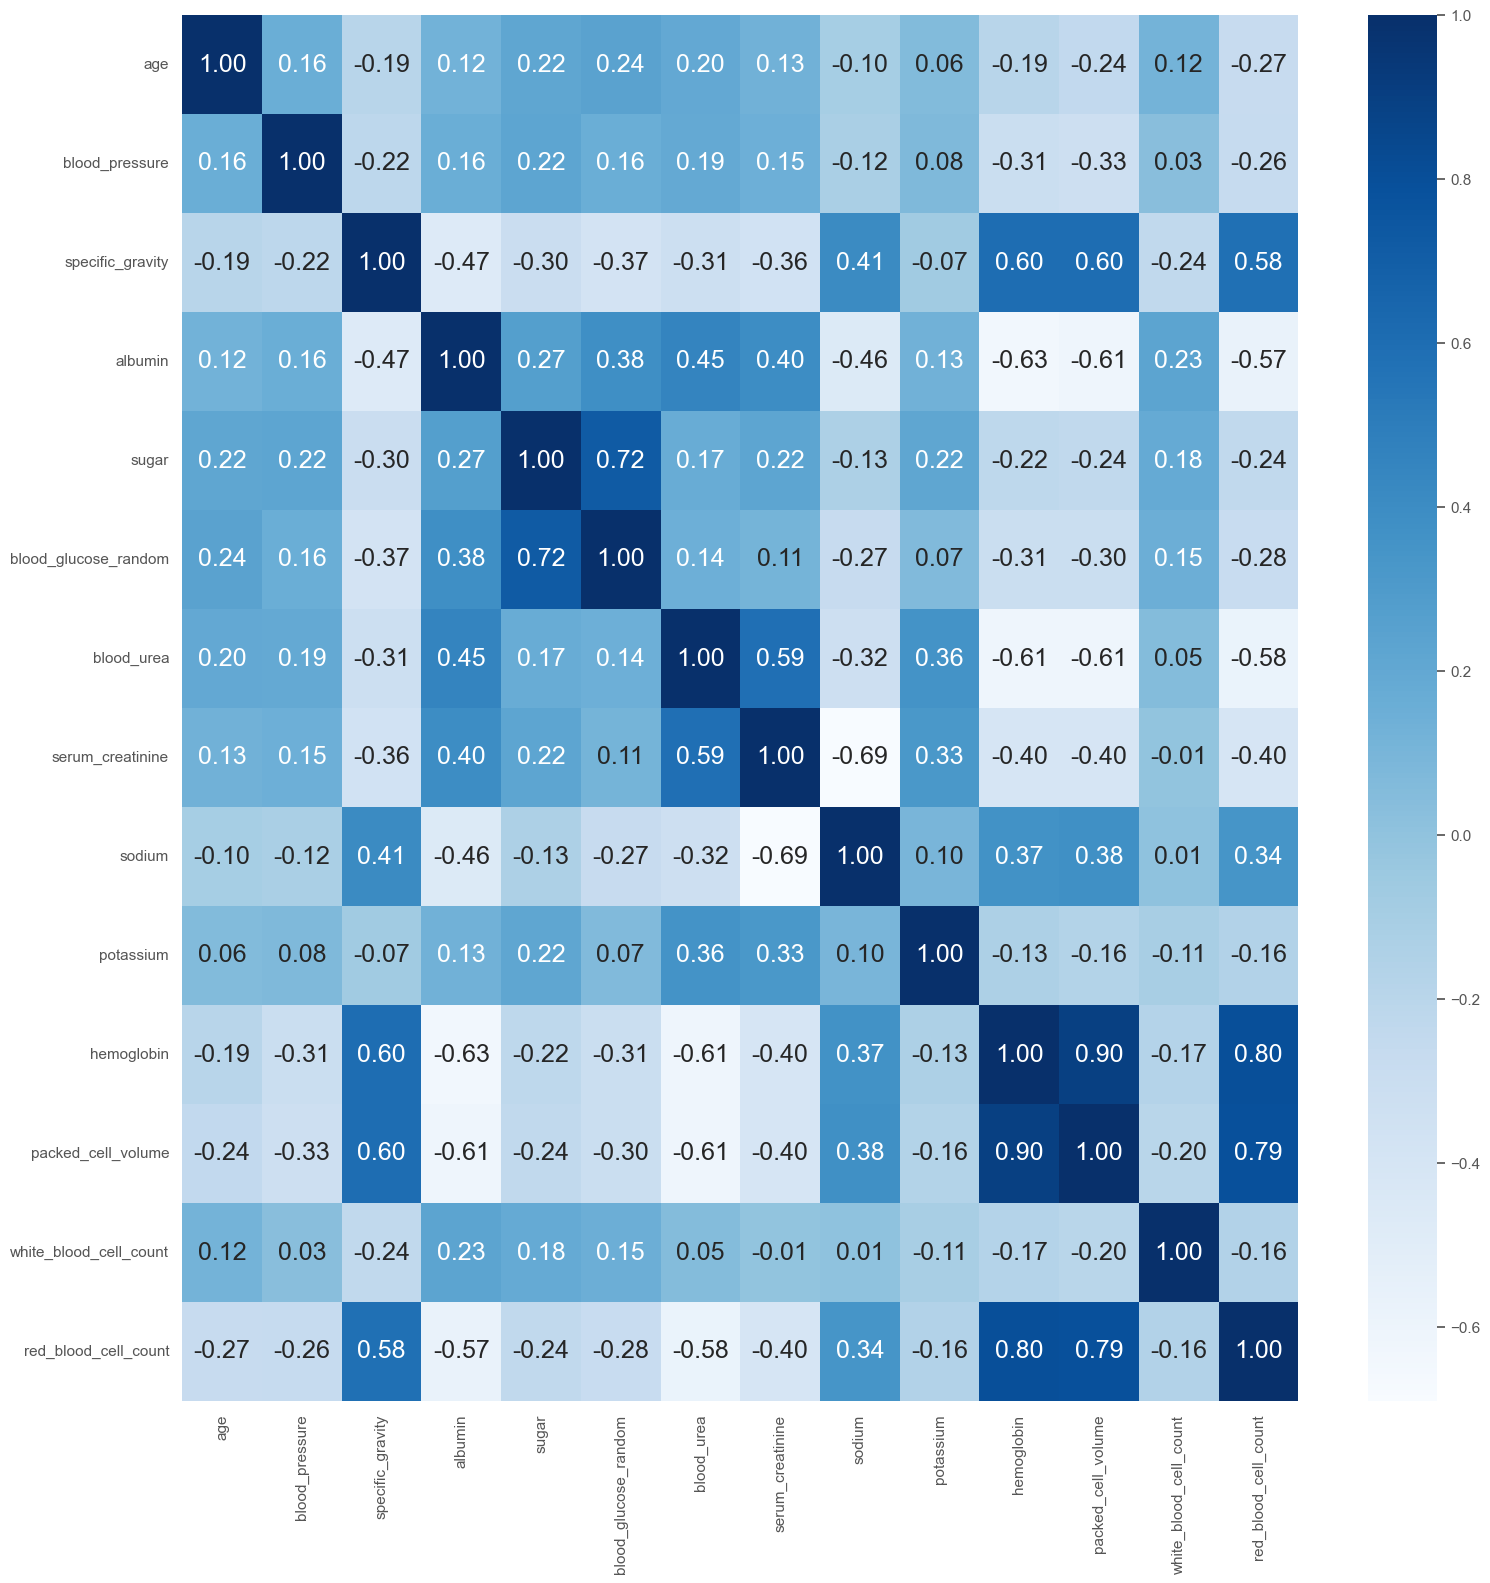

In [36]:
plt.figure(figsize=(18,18))
sns.heatmap(dataset.corr(numeric_only=True), cmap = "Blues", annot = True,annot_kws={"size": 18}, fmt = '.2f')
plt.show()

In [37]:
# EDA   (Exploratory Data Analysis)

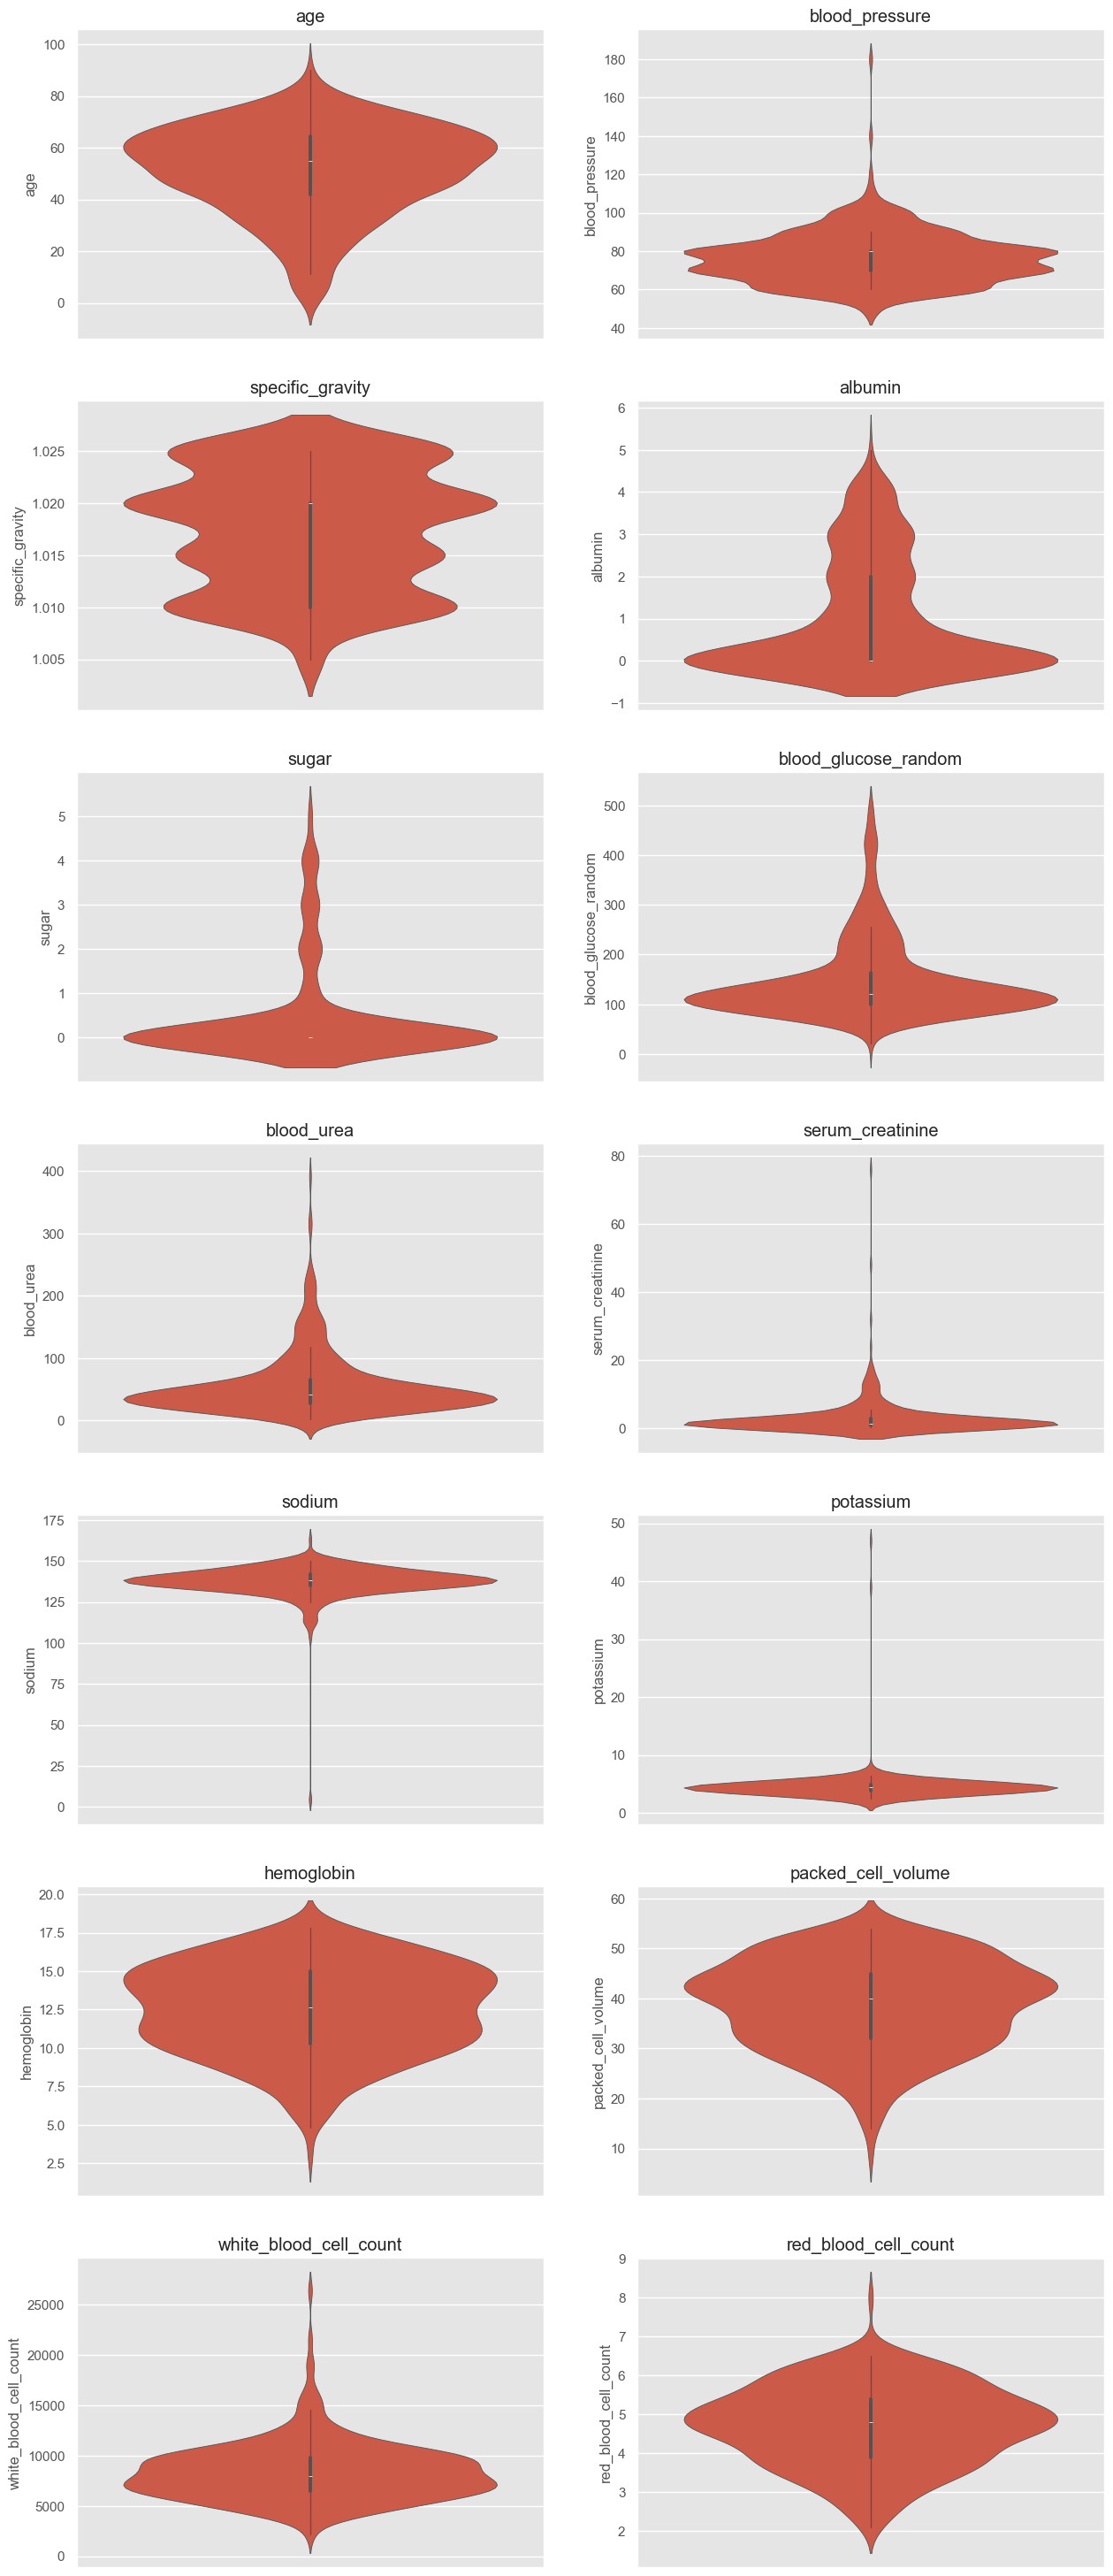

In [38]:
#  we need to plot the histogram for all the numeric columns.
dataset.columns
plt.figure(figsize=(15,70))
for i,val in enumerate(numerical_col):
    plt.subplot(13, 2, i + 1)
    sns.violinplot(dataset[val])
    plt.title(val)
plt.show()

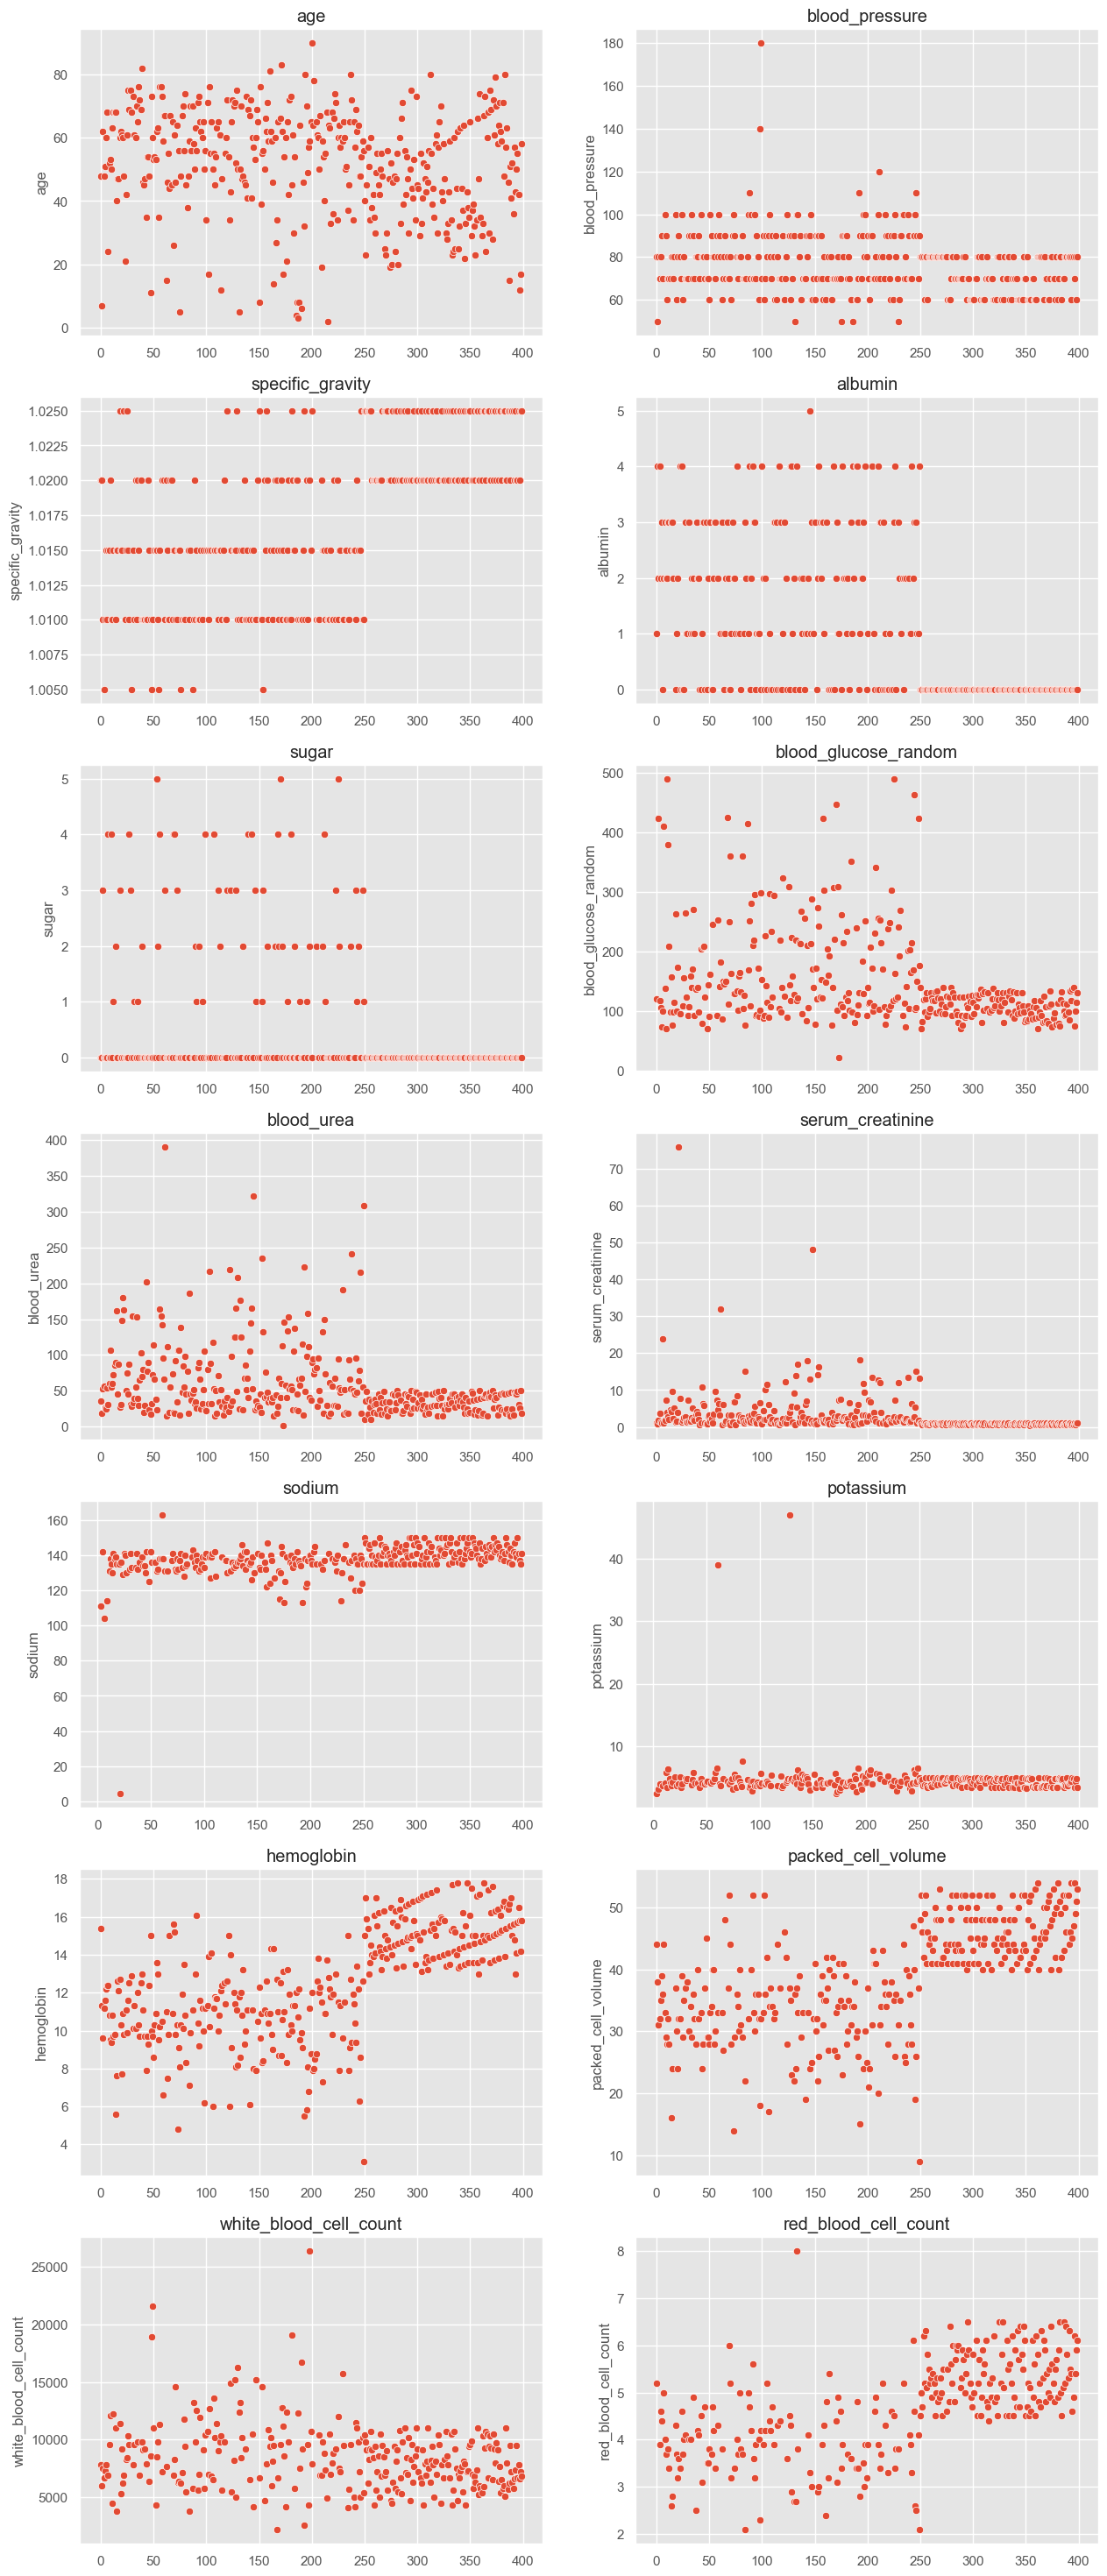

In [39]:
#  we need to plot the Violin PLot for all the numeric columns.
dataset.columns
plt.figure(figsize=(15,70))
for i,val in enumerate(numerical_col):
    plt.subplot(13, 2, i + 1)
    sns.scatterplot(dataset[val])
    plt.title(val)
plt.show()

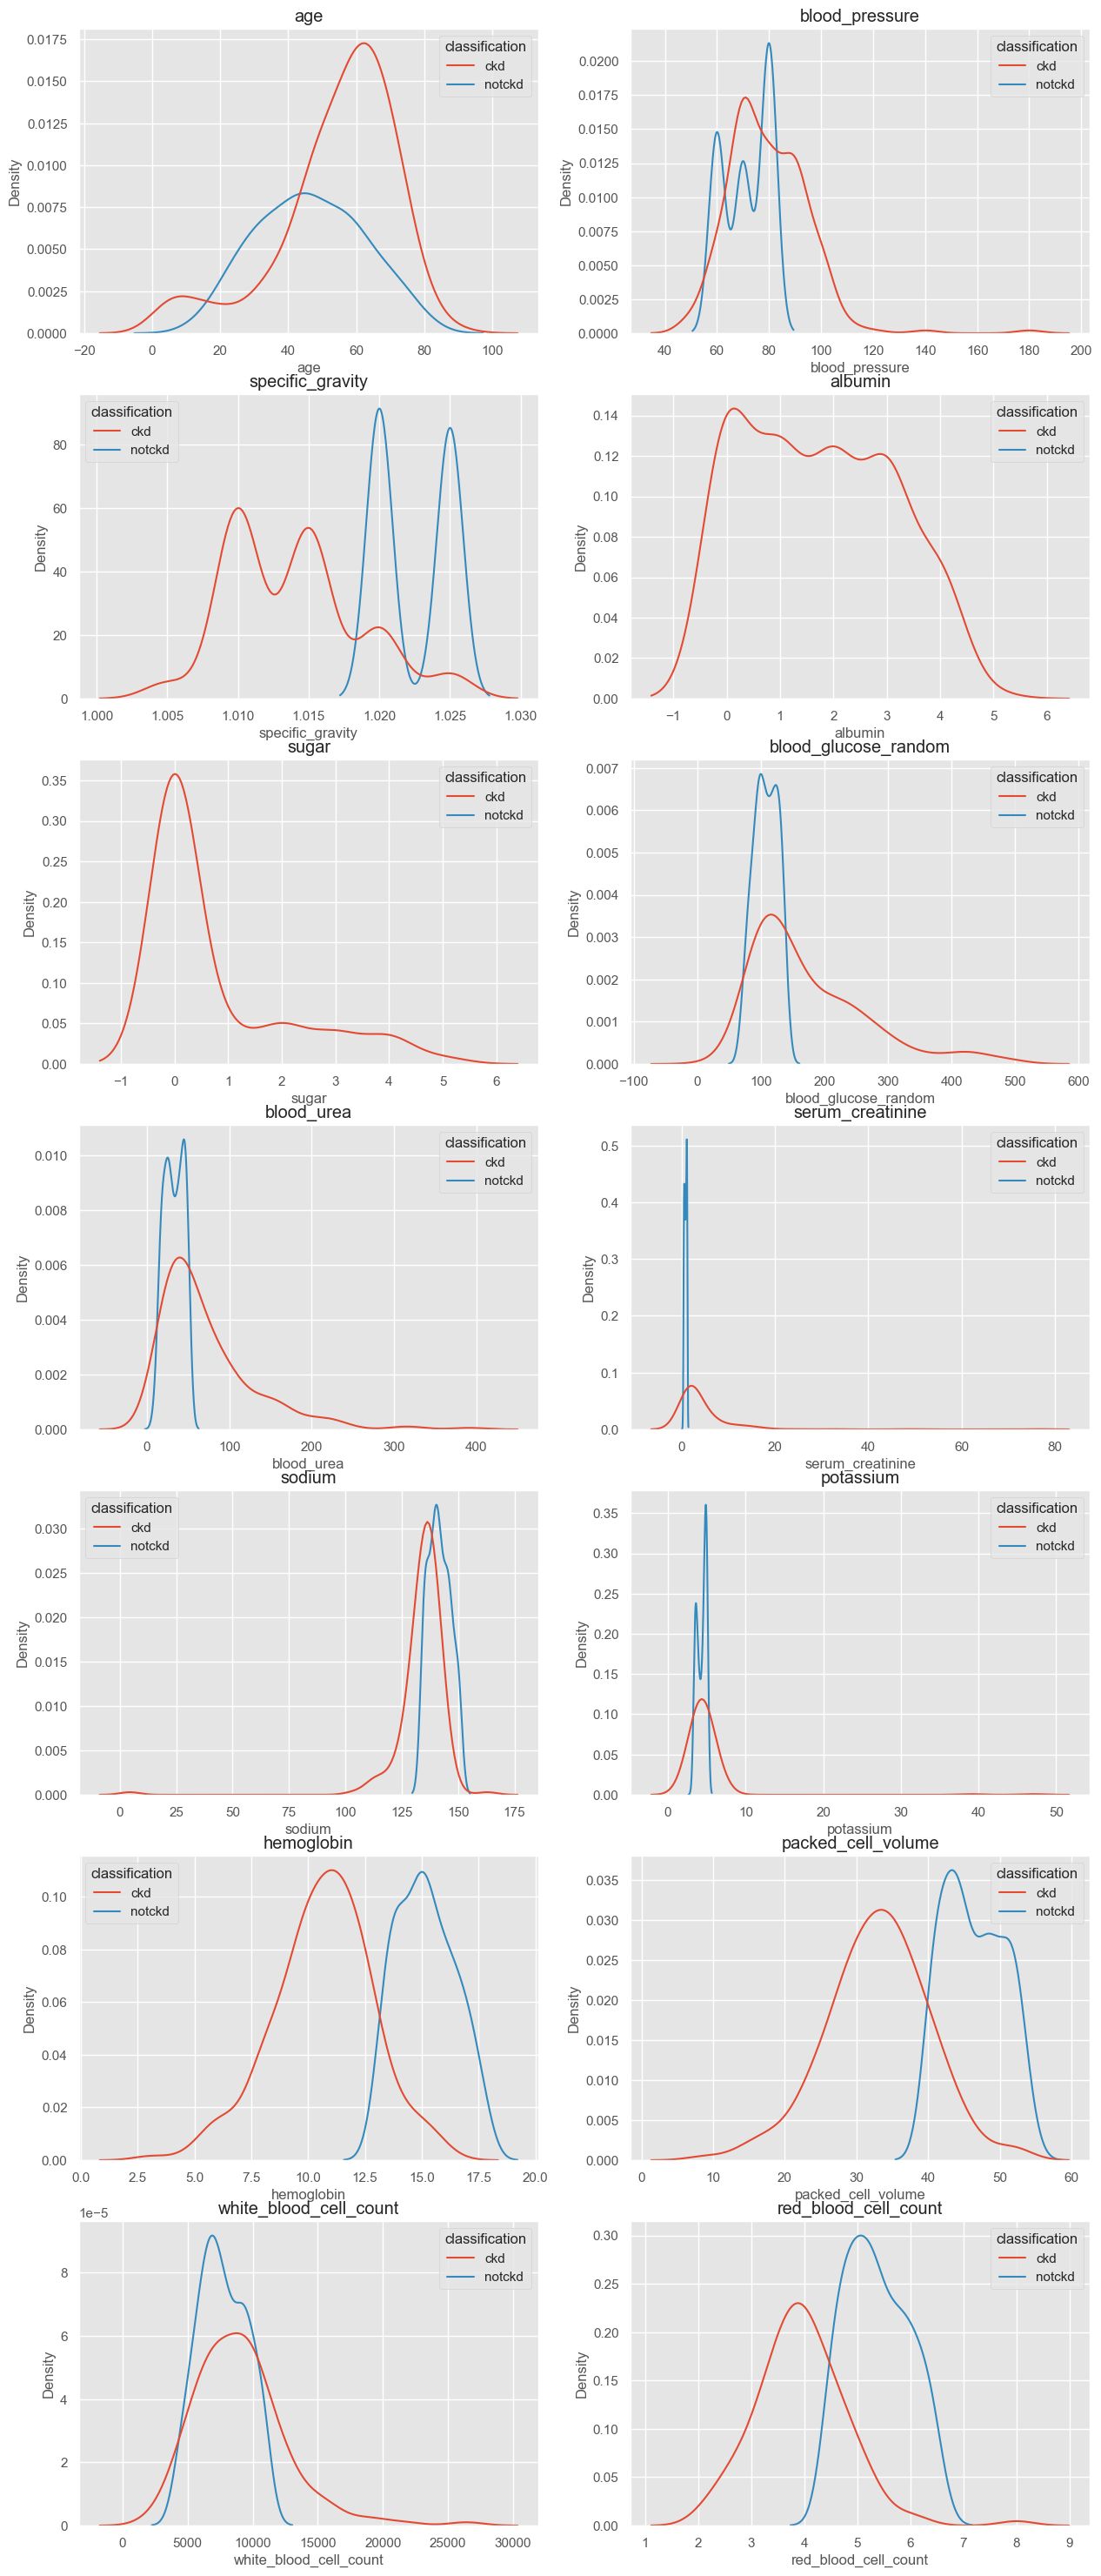

In [40]:
 # we need to plot the kde for all the numeric columns.
dataset.columns
plt.figure(figsize=(15,70))
for i,val in enumerate(numerical_col):
    plt.subplot(13, 2, i + 1)
    sns.kdeplot(x = val, hue = "classification", data = dataset)
    plt.title(val)
plt.show()

## Data Pre Processing

In [41]:
#  Checking the mmissing value.
dataset.isnull().sum().sort_values(ascending = False)

#  The dataset is small so we dont drop the null columns.

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
hemoglobin                  52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
classification               0
dtype: int64

In [42]:
# dataset[categorical_col]

In [43]:
dataset[categorical_col].isnull().sum()

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
classification               0
dtype: int64

In [44]:
dataset[numerical_col].isnull().sum()

age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
hemoglobin                 52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

##  There are the 2 methods for handling the numeric missing value.
1. Using the Random Sampling - fill the random value between the range of the feature.
2. Using the Mode Imputation - fill the mode value everywhere for the missing value.

In [45]:
def random_sampling(feature):
    random_sample = dataset[feature].dropna().sample(dataset[feature].isna().sum())
    random_sample.index = dataset[dataset[feature].isnull()].index
    dataset.loc[dataset[feature].isnull(), feature] = random_sample

#  Second Method.
# def random_sampling(feature):
#      df[feature] = df[feature].apply(lambda x: np.random.choice(df[feature].dropna()) if pd.isnull(x) else x)

def impute_mode(feature):
    mode = dataset[feature].mode()[0]
    dataset[feature] = dataset[feature].fillna(mode)

In [46]:
#  Random Sampling for the numeric value.
for col in numerical_col:
    random_sampling(col)

In [47]:
# dataset[numerical_col].isnull().sum()
dataset[categorical_col].isnull().sum()

#  in the categorical values we just replace the 2 top higher missing values with the random sampling and rest replace with the mode.

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
classification               0
dtype: int64

In [48]:
#  Apply the random Sampling for the 2 topmost null values.
random_sampling("red_blood_cells")
random_sampling("pus_cell")

In [49]:
#  Apply the random Sampling for the rest Columns.
random_sampling("red_blood_cells")
random_sampling("pus_cell")

for col in categorical_col:
    impute_mode(col)

In [50]:
dataset[categorical_col].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
classification             0
dtype: int64

In [51]:
dataset.classification.value_counts()

classification
ckd       250
notckd    150
Name: count, dtype: int64

In [52]:
# Encoded the dataset categorical to the numerical Value.
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for i,val in enumerate(categorical_col):
    dataset[val] = encoder.fit_transform(dataset[val])

In [53]:
dataset

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,100.0,...,38.0,6000.0,5.8,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.5,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,47.0,6700.0,4.9,0,0,0,0,0,0,1
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,54.0,7800.0,6.2,0,0,0,0,0,0,1
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,49.0,6600.0,5.4,0,0,0,0,0,0,1
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,51.0,7200.0,5.9,0,0,0,0,0,0,1


## Model Building and Implementation

In [54]:
#  Divide the dataset into the dependent and the independent features.

x = dataset.drop('classification', axis=1)
y = dataset["classification"]

In [55]:
# Divide the dataset into the train test split.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [56]:
dataset.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.282500,76.600000,1.017450,0.997500,0.462500,0.81750,0.777500,0.105000,0.055000,146.580000,...,38.862500,8531.000000,4.734250,0.367500,0.34250,0.085000,0.205000,0.190000,0.150000,0.375000
std,17.235584,13.597877,0.005686,1.351688,1.103012,0.38674,0.416446,0.306937,0.228266,79.496086,...,8.851807,2988.078066,1.037711,0.482728,0.47514,0.279231,0.404207,0.392792,0.357519,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,22.000000,...,9.000000,2200.000000,2.100000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,1.00000,1.000000,0.000000,0.000000,99.000000,...,32.000000,6600.000000,3.975000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,80.000000,1.020000,0.000000,0.000000,1.00000,1.000000,0.000000,0.000000,119.500000,...,40.000000,8150.000000,4.800000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,64.000000,80.000000,1.020000,2.000000,0.000000,1.00000,1.000000,0.000000,0.000000,159.250000,...,45.000000,9800.000000,5.500000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.00000,1.000000,1.000000,1.000000,490.000000,...,54.000000,26400.000000,8.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
print((dataset["classification"].value_counts()[0] * 100 )/ len(dataset["classification"]))
print((dataset["classification"].value_counts()[1] * 100 )/ len(dataset["classification"]))

62.5
37.5


In [58]:
#  Scaling the dataset.
from sklearn.preprocessing import StandardScaler

In [59]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [60]:
# Model Building.

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [62]:
model1 = KNeighborsClassifier(n_neighbors=5)
model1.fit(x_train, y_train)

KNeighborsClassifier()

In [63]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.6.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

 Copyright (c) 2007-2024 The scikit-learn developers.
 All rights reserved.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions are met:

 * Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

 * Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

 * Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived from
   this software without specific prior written permission.

 THIS SOFTWARE IS PROVIDED BY THE COPYR

In [64]:
print("Accuracy for the training:- ", accuracy_score(model1.predict(x_train), y_train) * 100)
print("Accuracy for the testing:- ", accuracy_score(model1.predict(x_test), y_test) * 100)
print("Confusion Matrix- ",confusion_matrix(model1.predict(x_test), y_test))
print("Classification Report:- ", classification_report(model1.predict(x_test), y_test))

Accuracy for the training:-  95.9375
Accuracy for the testing:-  95.0
Confusion Matrix-  [[40  0]
 [ 4 36]]
Classification Report:-                precision    recall  f1-score   support

           0       0.91      1.00      0.95        40
           1       1.00      0.90      0.95        40

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



In [65]:
dataset.classification.value_counts()

classification
0    250
1    150
Name: count, dtype: int64

In [66]:
#  Decision Tree Classifier
model2 = DecisionTreeClassifier()

grid_parameter = {
    "criterion": ["gini", "entropy", "log_loss"],
    "splitter" : ["best", "random"],
    "max_depth": [3,5,7,10],
    "min_samples_split":[1,3,5,79],
    "min_samples_leaf": [1,2,3,5,7],
    "max_features" : ["sqrt", "log2"],
}

grid_search = GridSearchCV(model2, grid_parameter, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 3, 5, 79],
                         'splitter': ['best', 'random']},
             verbose=1)

In [67]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'splitter': 'best'}

In [68]:
grid_search.best_score_

0.978125

In [69]:
model2 = DecisionTreeClassifier(criterion = 'entropy', max_depth= 7, max_features= 'log2' , min_samples_leaf= 5, min_samples_split= 79,splitter= 'best')
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features='log2',
                       min_samples_leaf=5, min_samples_split=79)

In [70]:
#  The model will be overfitted so we need to apply the hyper parameter tuning.
print("Accuracy for the training:- ", accuracy_score(model2.predict(x_train), y_train) * 100)
print("Accuracy for the testing:- ", accuracy_score(model2.predict(x_test), y_test) * 100)
print("Confusion Matrix- ",confusion_matrix(model2.predict(x_test), y_test))
print("Classification Report:- ", classification_report(model2.predict(x_test), y_test))

Accuracy for the training:-  97.1875
Accuracy for the testing:-  98.75
Confusion Matrix-  [[44  1]
 [ 0 35]]
Classification Report:-                precision    recall  f1-score   support

           0       1.00      0.98      0.99        45
           1       0.97      1.00      0.99        35

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [71]:
#  Do same thing for the Other Classifier Methods.
from sklearn.ensemble import RandomForestClassifier

In [72]:
model3 = RandomForestClassifier(criterion="gini", n_estimators=400, max_depth=10, min_samples_split=5, min_samples_leaf=1, max_features="sqrt")

# parameters = {
#      "criterion": ["gini", "entropy", "log_loss"],
#     "n_estimators" : [100,200,300],
#     "max_depth": [3,5,7,10],
#     "min_samples_split":[1,3,5,7,9],
#     "min_samples_leaf": [1,2,3,5,7],
#     "max_features" : ["sqrt", "log2"],
# }

# grid_search = GridSearchCV(model3, parameters, n_jobs=1, cv=2, verbose = 1)
# grid_search.fit(x_train, y_train)

model3.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=400)

In [73]:
#  The model will be overfitted so we need to apply the hyper parameter tuning.
print("Accuracy for the training:- ", accuracy_score(model3.predict(x_train), y_train) * 100)
print("Accuracy for the testing:- ", accuracy_score(model3.predict(x_test), y_test) * 100)
print("Confusion Matrix- ",confusion_matrix(model3.predict(x_test), y_test))
print("Classification Report:- ", classification_report(model3.predict(x_test), y_test))

Accuracy for the training:-  100.0
Accuracy for the testing:-  100.0
Confusion Matrix-  [[44  0]
 [ 0 36]]
Classification Report:-                precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        36

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [95]:
# !pip install --upgrade xgboost

In [98]:
#  Implementation for the XG Boost Algorithms.
# from xgboost import XGBClassifier

In [99]:
# model4 = XGBClassifier()
# model4.fit(x_train, y_train)

In [100]:
# #  The model will be overfitted so we need to apply the hyper parameter tuning.
# print("Accuracy for the training:- ", accuracy_score(model4.predict(x_train), y_train) * 100)
# print("Accuracy for the testing:- ", accuracy_score(model4.predict(x_test), y_test) * 100)
# print("Confusion Matrix- ",confusion_matrix(model4.predict(x_test), y_test))
# print("Classification Report:- ",classification_report(model4.predict(x_test), y_test))

In [77]:
#  Implement the Support Vector Classifier.
from sklearn.svm import SVC

In [78]:
model5 = SVC()
parameters = {
    "C": [0.1,0.3,0.5,0.7,0.9],
    "gamma" : ["scale", "auto"],
}
grid_search = GridSearchCV(model5, parameters)
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.3, 0.5, 0.7, 0.9],
                         'gamma': ['scale', 'auto']})

In [79]:
grid_search.best_params_

{'C': 0.3, 'gamma': 'scale'}

In [80]:
grid_search.best_score_

0.990625

In [81]:
model5 = SVC(C = 0.16, gamma = "auto")
model5.fit(x_train, y_train)

SVC(C=0.16, gamma='auto')

In [82]:
#  The model will be overfitted so we need to apply the hyper parameter tuning.
print("Accuracy for the training:- ", accuracy_score(model5.predict(x_train), y_train) * 100)
print("Accuracy for the testing:- ", accuracy_score(model5.predict(x_test), y_test) * 100)
print("Confusion Matrix- ",confusion_matrix(model5.predict(x_test), y_test))
print("Classification Report:- ",classification_report(model5.predict(x_test), y_test))

Accuracy for the training:-  98.75
Accuracy for the testing:-  97.5
Confusion Matrix-  [[42  0]
 [ 2 36]]
Classification Report:-                precision    recall  f1-score   support

           0       0.95      1.00      0.98        42
           1       1.00      0.95      0.97        38

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80



In [83]:
#  Implement the Logistic Regression.
from sklearn.linear_model import LogisticRegression

In [84]:
model6 = LogisticRegression(C=0.1)
model6.fit(x_train, y_train)

LogisticRegression(C=0.1)

In [85]:
#  The model will be overfitted so we need to apply the hyper parameter tuning.
print("Accuracy for the training:- ", accuracy_score(model6.predict(x_train), y_train) * 100)
print("Accuracy for the testing:- ", accuracy_score(model6.predict(x_test), y_test) * 100)
print("Confusion Matrix- ",confusion_matrix(model6.predict(x_test), y_test))
print("Classification Report:- ",classification_report(model6.predict(x_test), y_test))

Accuracy for the training:-  98.75
Accuracy for the testing:-  100.0
Confusion Matrix-  [[44  0]
 [ 0 36]]
Classification Report:-                precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        36

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [86]:
#  Use the Implementation for the Ada Boost.
from sklearn.ensemble import GradientBoostingClassifier

In [87]:
model7 = GradientBoostingClassifier()

parameters = {
    "loss":["log_loss", "exponential"],
    "learning_rate":[0.001,0.01,0.1,0.2],
    "n_estimators":[100,200],
    # "criterion":['friedman_mse', 'squared_error'],
    # "min_samples_split":[2,4,5,6],
    # "min_samples_leaf":[1,2,3],
    # "max_depth": [3,5,7,9],
}

grid_search = GridSearchCV(model7, parameters)
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'loss': ['log_loss', 'exponential'],
                         'n_estimators': [100, 200]})

In [88]:
grid_search.best_params_

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 200}

In [89]:
grid_search.best_score_

0.965625

In [90]:
model7 = GradientBoostingClassifier(learning_rate=0.5, loss = "exponential", n_estimators=100)
model7.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, loss='exponential')

In [91]:
#  The model will be overfitted so we need to apply the hyper parameter tuning.
print("Accuracy for the training:- ", accuracy_score(model7.predict(x_train), y_train) * 100)
print("Accuracy for the testing:- ", accuracy_score(model7.predict(x_test), y_test) * 100)
print("Confusion Matrix- ",confusion_matrix(model7.predict(x_test), y_test))
print("Classification Report:- ",classification_report(model7.predict(x_test), y_test))

Accuracy for the training:-  100.0
Accuracy for the testing:-  98.75
Confusion Matrix-  [[43  0]
 [ 1 36]]
Classification Report:-                precision    recall  f1-score   support

           0       0.98      1.00      0.99        43
           1       1.00      0.97      0.99        37

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [101]:
# Model Comparision
model_comparision = pd.DataFrame({
    "Model" :["K Nearest Neighbour", "Decision Tree Classifier", "Random Forest Classifier" ,"SVC", "Logistic Regression", "Gradient Boost Classifier"],
    "Accuracy" : [accuracy_score(model1.predict(x_test), y_test) * 100, accuracy_score(model2.predict(x_test), y_test) * 100, accuracy_score(model3.predict(x_test), y_test) * 100, accuracy_score(model5.predict(x_test), y_test) * 100, accuracy_score(model6.predict(x_test), y_test) * 100, accuracy_score(model7.predict(x_test), y_test) * 100]})

In [102]:
#  Find the Cross Validation Score for all the models.
models = [
{
    'label': 'LR',
    'model': model1,
},
{
    'label': 'DT',
    'model': model2,
},
{
    'label': 'SVM',
    'model': model3,
},
{
    'label': 'RF',
    'model': model6,
},
{
    'label': 'GBDT',
    'model': model7,
},
    {
    'label': 'KNN',
    'model': model4,
}
]

In [103]:
# !pip install --upgrade scikit-learn
# !pip show scikit-learn
import sys
print("Python Path:", sys.executable)
print("Python Version:", sys.version)


Python Path: C:\Users\USER\AppData\Local\Programs\Python\Python312\python.exe
Python Version: 3.12.6 (tags/v3.12.6:a4a2d2b, Sep  6 2024, 20:11:23) [MSC v.1940 64 bit (AMD64)]


In [104]:
for mod in models:
    print(f"The validation score for the {mod['label']}")
    cross_v = cross_val_score(mod['model'], x_train, y_train, cv = 5, n_jobs = -1)
    print(f"The cross validation are:- {cross_v}")
    print(f"The average cross validation are:- {cross_v.mean()}")
    print("-" * 60)

The validation score for the LR
The cross validation are:- [0.921875 0.921875 0.953125 0.890625 0.9375  ]
The average cross validation are:- 0.925
------------------------------------------------------------
The validation score for the DT
The cross validation are:- [0.96875  0.921875 0.953125 0.953125 0.953125]
The average cross validation are:- 0.95
------------------------------------------------------------
The validation score for the SVM
The cross validation are:- [0.984375 0.984375 0.984375 0.953125 0.984375]
The average cross validation are:- 0.978125
------------------------------------------------------------
The validation score for the RF
The cross validation are:- [0.953125 0.96875  0.984375 1.       1.      ]
The average cross validation are:- 0.98125
------------------------------------------------------------
The validation score for the GBDT
The cross validation are:- [0.96875  0.953125 0.96875  0.96875  0.96875 ]
The average cross validation are:- 0.965625
-----------

AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [105]:
import sklearn
print(sklearn.__version__)

1.6.1


In [106]:
model_comparision

,Model,Accuracy
0,K Nearest Neighbour,95.00
1,Decision Tree Classifier,98.75
2,Random Forest Classifier,100.00
3,SVC,97.50
4,Logistic Regression,100.00
5,Gradient Boost Classifier,98.75


In [107]:
import sklearn
print(sklearn.__file__)

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\__init__.py


In [108]:
# High Accuracy Model Save

#  we have the K Nearest Neighbour Algorithm have high accuracy.
import pickle

In [111]:
pickle.dump(model5, open("bestModel.pkl", "wb"))

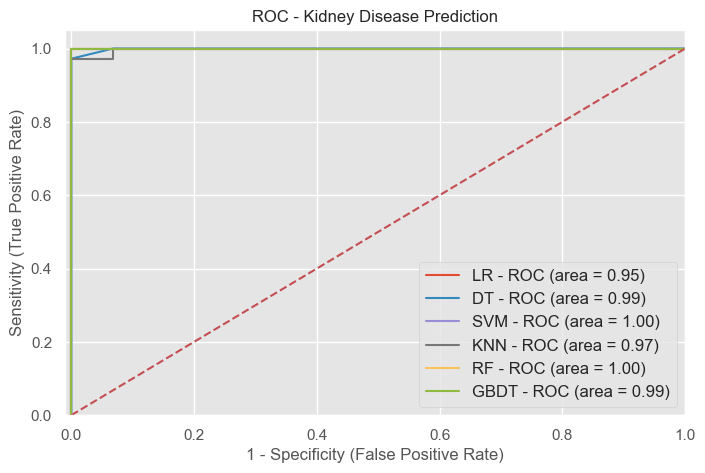

In [112]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': model1,
},
{
    'label': 'DT',
    'model': model2,
},
{
    'label': 'SVM',
    'model': model3,
},
{
    'label': 'KNN',
    'model': model4,
},
# {
#     'label': 'XGBoost',
#     'model': model5,
# },
{
    'label': 'RF',
    'model': model6,
},
{
    'label': 'GBDT',
    'model': model7,
}
]
for m in models:
    model = m['model'] 
    model.fit(x_train, y_train) 
    y_pred=model.predict(x_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(x_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(x_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Kidney Disease Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("roc_kidney.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()